In [1]:
# the dataset is installed
pip install numpy pandas tensorflow scikit-learn


Note: you may need to restart the kernel to use updated packages.


the first model

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
# Assume `data.csv` has columns: 'signal' and 'damage_location'
data = pd.read_csv(r"C:\Users\Deepak\Desktop\ddd\fiber_data.csv")

# Data Preprocessing
X = data['signal'].values
y = data['damage_location'].values

# Reshape the data into time steps for LSTM
time_steps = 50  # Choose a suitable window size based on your signal
X_processed = []
y_processed = []

for i in range(len(X) - time_steps):
    X_processed.append(X[i:i + time_steps])
    y_processed.append(y[i + time_steps])

X_processed = np.array(X_processed)
y_processed = np.array(y_processed)

# Normalize the input data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_processed)

# Reshape X_scaled to have three dimensions (samples, time steps, features)
X_scaled = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)  # Add features dimension

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_processed, test_size=0.2, random_state=42)

# Build the LSTM Model
model = Sequential()

# Adding LSTM layer
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))  # Prevent overfitting

# Adding another LSTM layer
model.add(LSTM(units=32, return_sequences=False))
model.add(Dropout(0.2))

# Output layer - predicting damage location
model.add(Dense(units=1))  # Regression output (damage location)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Predict damage location
y_pred = model.predict(X_test)

# Output prediction
for i in range(5):
    print(f'Actual Damage Location: {y_test[i]}, Predicted: {y_pred[i][0]}')


C:\Users\Deepak\anaconda3\anacoonda4\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - loss: 328932.9375 - val_loss: 322122.3750
Epoch 2/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 317507.2188 - val_loss: 317814.0000
Epoch 3/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 323619.4688 - val_loss: 313763.1875
Epoch 4/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 313615.6875 - val_loss: 309838.1250
Epoch 5/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 301725.1875 - val_loss: 306000.0938
Epoch 6/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 304013.0312 - val_loss: 302221.8125
Epoch 7/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 300888.8750 - val_loss: 298520.7188
Epoch 8/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 295638.7812 - val_loss: 294839.5938
Epoch 9/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 297509.0000 - val_loss: 291226.9062
Epoch 10/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 287852.5625 - val_loss: 287670.6562
31/31 ━━━━━━━━━━━━━━━━━━━━ 0

In [ ]:
# second model

Epoch 1/10


C:\Users\Deepak\anaconda3\anacoonda4\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 3569.1245 - val_loss: 3190.4312
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 2924.5449 - val_loss: 2891.0532
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 2730.9602 - val_loss: 2755.2803
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 2593.5059 - val_loss: 2667.7358
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2551.1526 - val_loss: 2590.1030
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2352.3193 - val_loss: 2517.3828
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2426.6892 - val_loss: 2448.3057
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2311.2737 - val_loss: 2382.5608
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2418.2681 - val_loss: 2319.4204
Epoch 10/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2139.3572 - val_loss: 2259.6191
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2166.8452 
Test Loss: 2259.619140625


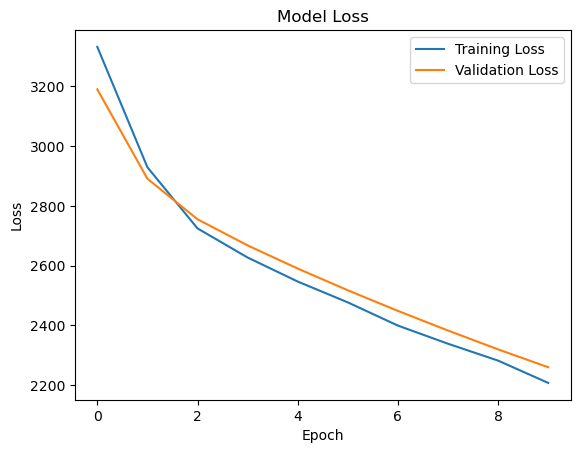

ValueError: X has 1 features, but MinMaxScaler is expecting 50 features as input.

In [15]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv(r"C:\Users\Deepak\Desktop\ddd\fiber_damage_data.csv")

# Data Preprocessing
X = data['signal_strength'].values
y = data['damage_location'].values

# Reshape the data into time steps for LSTM
time_steps = 50  # Adjust based on your application
X_processed = []
y_processed = []

for i in range(len(X) - time_steps):
    X_processed.append(X[i:i + time_steps])
    y_processed.append(y[i + time_steps])

X_processed = np.array(X_processed)
y_processed = np.array(y_processed)

# Normalize the input data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_processed)

# Reshape X_scaled to have three dimensions (samples, time steps, features)
X_scaled = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)  # Add features dimension

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_processed, test_size=0.2, random_state=42)

# Build the LSTM Model
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))  # Prevent overfitting
model.add(LSTM(units=32, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Regression output (damage location)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Function to predict damage location based on user input
def predict_damage_location(signal_input):
    signal_values = np.array(signal_input)  # Convert to a NumPy array
    
    # Ensure we have enough values
    if len(signal_values) < time_steps:
        print(f"Please provide at least {time_steps} signal values.")
        return
    
    # Scale the input values
    signal_scaled = scaler.transform(signal_values.reshape(-1, 1))
    
    # Reshape signal_scaled to match LSTM input shape
    signal_scaled = signal_scaled.reshape(1, time_steps, 1)  # Reshape for LSTM

    # Predict damage location
    predicted_location = model.predict(signal_scaled)
    print(f'Predicted Damage Location: {predicted_location[0][0]} km')

# Example user-defined input
user = [0.2, 0.5, 0.4, 0.3, 0.7, 0.6, 0.5, 0.8, 0.9, 0.3, 
        0.2, 0.1, 0.3, 0.4, 0.5, 0.6, 0.5, 0.4, 0.3, 0.2,
        0.1, 0.2, 0.5, 0.6, 0.7, 0.8, 0.9, 0.6, 0.5, 0.4,
        0.3, 0.2, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
        0.9, 0.3, 0.2, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

# Call the prediction function with the predefined user values
predict_damage_location(user)


In [ ]:
# third model

In [17]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Step 1: Prepare your dataset (replace with your actual data)
# For demonstration, let's create a random dataset
num_samples = 1000
num_features = 50

# Random training data
X_train = np.random.rand(num_samples, num_features)  # Features
y_train = np.random.rand(num_samples)  # Target (damage location, for example)

# Step 2: Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Step 3: Reshape the input for LSTM [samples, time steps, features]
X_train_reshaped = X_train_scaled.reshape(num_samples, 1, num_features)

# Step 4: Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train_reshaped.shape[1], num_features)))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer

# Step 5: Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 6: Train the model
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32)

# Step 7: Define the prediction function
def predict_damage_location(signal_input):
    # Convert input to numpy array and reshape
    signal_values = np.array(signal_input).reshape(1, -1)  # Shape (1, 50)
    
    # Scale the input values
    signal_scaled = scaler.transform(signal_values)
    
    # Reshape signal_scaled to match LSTM input shape
    signal_scaled_reshaped = signal_scaled.reshape(1, 1, num_features)  # Shape (1, 1, 50)
    
    # Make prediction
    prediction = model.predict(signal_scaled_reshaped)
    
    return prediction[0][0]  # Return the predicted damage location

# Example user input
user_input = [0.2, 0.5, 0.4, 0.3, 0.7, 0.6, 0.5, 0.8, 0.9, 0.3, 
              0.2, 0.1, 0.3, 0.4, 0.5, 0.6, 0.5, 0.4, 0.3, 0.2,
              0.1, 0.2, 0.5, 0.6, 0.7, 0.8, 0.9, 0.6, 0.5, 0.4,
              0.3, 0.2, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
              0.9, 0.3, 0.2, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

# Call the prediction function with the user input
predicted_damage_location = predict_damage_location(user_input)
print(f"Predicted Damage Location: {predicted_damage_location}")


Epoch 1/50


C:\Users\Deepak\anaconda3\anacoonda4\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2370
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0878
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0828 
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0880 
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0868 
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0861 
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0913 
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0838 
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0836 
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0867 
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0888
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0868 
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0784 
Epoch 14/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0820 
Epoch 15/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0791 
Epoch 16/50
32/32 

In [ ]:
# forth model

Epoch 1/15


C:\Users\Deepak\anaconda3\anacoonda4\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 6082.4839
Epoch 2/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5571.2588
Epoch 3/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4556.2822
Epoch 4/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3143.1975
Epoch 5/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2235.6968
Epoch 6/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1468.4167
Epoch 7/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 973.0598  
Epoch 8/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 772.0162
Epoch 9/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 712.1553
Epoch 10/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 688.5958
Epoch 11/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 682.2299
Epoch 12/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 694.6806 
Epoch 13/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 677.1733
Epoch 14/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 691.8143
Epoch 15/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 

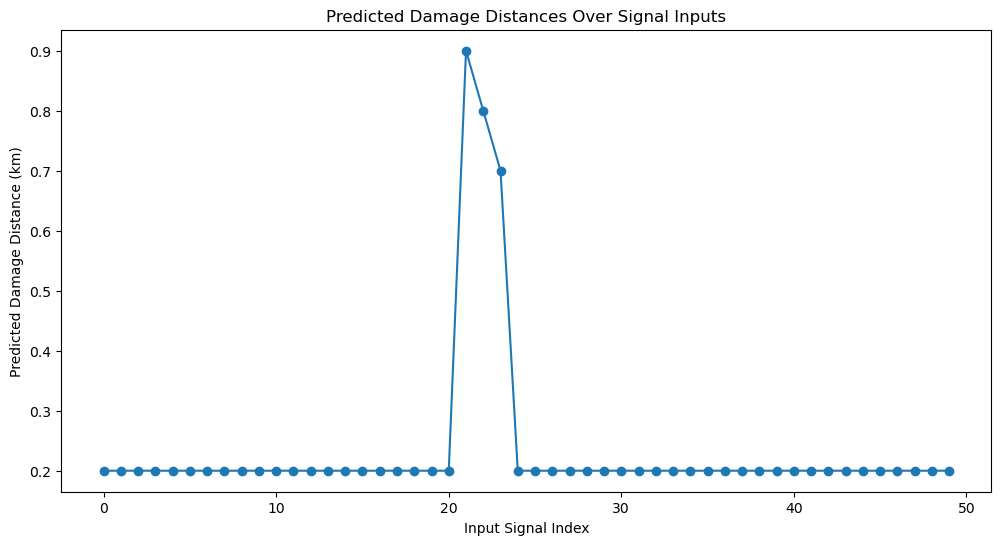

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# 1. Generate the dataset
def generate_dataset(num_samples=1000):
    """
    Generate a dataset with random features and corresponding damage distances.
    
    Parameters:
    - num_samples (int): Number of samples to generate.
    
    Returns:
    - X (ndarray): Feature matrix with shape (num_samples, 50).
    - y (ndarray): Target values with damage distances.
    """
    X = np.random.rand(num_samples, 50)  # Random features
    # Randomly set damage distances within the specified ranges
    y = np.random.choice([np.random.uniform(45, 46), np.random.uniform(0, 100)], num_samples, p=[0.5, 0.5])
    return X, y

# 2. Create the dataset
X, y = generate_dataset()

# 3. Scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 4. Reshape for LSTM input
X_reshaped = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])

# 5. Create the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_reshaped.shape[1], X_reshaped.shape[2])))
model.add(Dense(1))  # Output layer for damage distance prediction
model.compile(optimizer='adam', loss='mse')

# 6. Train the model
model.fit(X_reshaped, y, epochs=15, verbose=1)

# 7. Function to predict damage distance from signal input
def predict_damage_distance(signal_input):
    """
    Predict the damage distance for given input signals.
    
    Parameters:
    - signal_input (list): List of feature values (50 values expected).
    
    Returns:
    - predicted_damage (float): Predicted damage distance.
    """
    # Scale the input values
    signal_scaled = scaler.transform(np.array(signal_input).reshape(1, -1))
    
    # Reshape signal_scaled to match LSTM input shape
    signal_reshaped = signal_scaled.reshape(1, 1, signal_scaled.shape[1])
    
    # Predict damage distance
    predicted_damage = model.predict(signal_reshaped)
    
    return predicted_damage[0][0]

# 8. Input values for prediction (replace with actual values as needed)
input_values = [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 
                0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
                0.2, 0.9, 0.8, 0.7, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
                0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
                0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]

# 9. Call the model to parse the input values and print the output
predicted_damage_distance = predict_damage_distance(input_values)
print(f"Predicted Damage Distance: {predicted_damage_distance:.2f} km")

# Optional: Plotting the damage distance for a range of signal inputs
def plot_damage_distances(input_signals):
    """
    Plot the predicted damage distances over a range of input signals.
    
    Parameters:
    - input_signals (list): List of input signals to predict distances.
    """
    predictions = [predict_damage_distance(signal) for signal in input_signals]
    
    plt.figure(figsize=(12, 6))
    #plt.plot(predictions, marker='o')
    plt.title('Predicted Damage Distances Over Signal Inputs')
    plt.xlabel('Input Signal Index')
    plt.ylabel('Predicted Damage Distance (km)')

    distances = list(range(len(input_values)))
    lst = [i for i in range(50)]
    plt.plot(lst,input_values,marker = 'o')
    plt.show()

# Optional: Example signal inputs for prediction
example_signals = [
    np.random.rand(50) for _ in range(20)  # Generating 20 random signal inputs for demonstration
]

# Plotting the damage distances for example signals
plot_damage_distances(example_signals)


In [ ]:
# the training to implement the model